# Customer churn prediction: Telecom Churn Dataset


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [4]:
cd C:\Users\stayclassy\Desktop\Python\End to End ML Project

C:\Users\stayclassy\Desktop\Python\End to End ML Project


In [5]:
df = pd.read_csv("churn_telecom.csv")

In [6]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [7]:
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
2661,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
2662,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
2663,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
2664,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
2665,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [9]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Account length,2666.0,100.620405,39.563974,1.00,73.0000,100.00,127.000,243.00
Area code,2666.0,437.438860,42.521018,408.00,408.0000,415.00,510.000,510.00
Number vmail messages,2666.0,8.021755,13.612277,0.00,0.0000,0.00,19.000,50.00
Total day minutes,2666.0,179.481620,54.210350,0.00,143.4000,179.95,215.900,350.80
Total day calls,2666.0,100.310203,19.988162,0.00,87.0000,101.00,114.000,160.00
Total day charge,2666.0,30.512404,9.215733,0.00,24.3800,30.59,36.700,59.64
Total eve minutes,2666.0,200.386159,50.951515,0.00,165.3000,200.90,235.100,363.70
Total eve calls,2666.0,100.023631,20.161445,0.00,87.0000,100.00,114.000,170.00
Total eve charge,2666.0,17.033072,4.330864,0.00,14.0500,17.08,19.980,30.91
Total night minutes,2666.0,201.168942,50.780323,43.70,166.9250,201.15,236.475,395.00


In [10]:
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [11]:
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [12]:
df.groupby('State')['State'].count()

State
AK    43
AL    66
AR    47
AZ    45
CA    24
CO    59
CT    59
DC    45
DE    51
FL    54
GA    49
HI    44
IA    38
ID    56
IL    45
IN    54
KS    52
KY    43
LA    35
MA    52
MD    60
ME    49
MI    58
MN    70
MO    51
MS    48
MT    53
NC    56
ND    44
NE    45
NH    43
NJ    50
NM    44
NV    61
NY    68
OH    66
OK    52
OR    62
PA    36
RI    48
SC    49
SD    49
TN    41
TX    55
UT    60
VA    67
VT    57
WA    48
WI    61
WV    88
WY    66
Name: State, dtype: int64

In [13]:
df.groupby('International plan')['International plan'].count()

International plan
No     2396
Yes     270
Name: International plan, dtype: int64

In [14]:
df.groupby('Voice mail plan')['Voice mail plan'].count()

Voice mail plan
No     1933
Yes     733
Name: Voice mail plan, dtype: int64

In [15]:
df.groupby('Churn')['Churn'].count()

Churn
False    2278
True      388
Name: Churn, dtype: int64

In [16]:
df.sort_values(by='Total day charge', ascending=False).head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
296,CO,154,415,No,No,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,True
780,NY,64,415,Yes,No,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,True
2087,OH,115,510,Yes,No,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,True
128,OH,83,415,No,No,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,True
485,MO,112,415,No,No,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,True


In [17]:
df.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [18]:
df['Total charge'] = df['Total day charge'] + df['Total eve charge'] + df['Total night charge'] + df['Total intl charge']

In [19]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


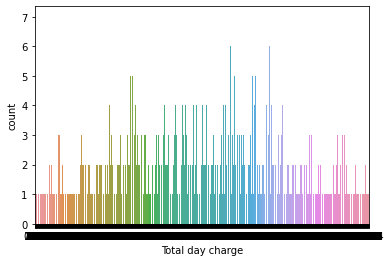

In [20]:
sns.countplot(x="Total day charge", data=df)

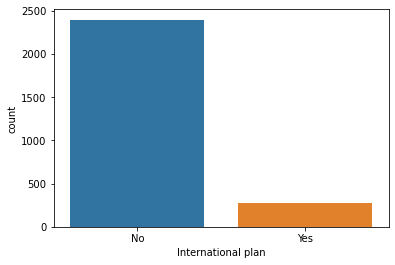

In [21]:
sns.countplot(x="International plan", data =df)

Text(0.5, 1.0, 'Total Evening Calls')

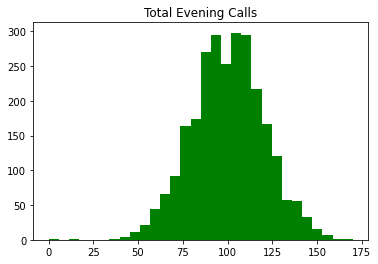

In [22]:
plt.hist(df['Total eve calls'], bins = 30, color = 'green')
plt.title('Total Evening Calls')

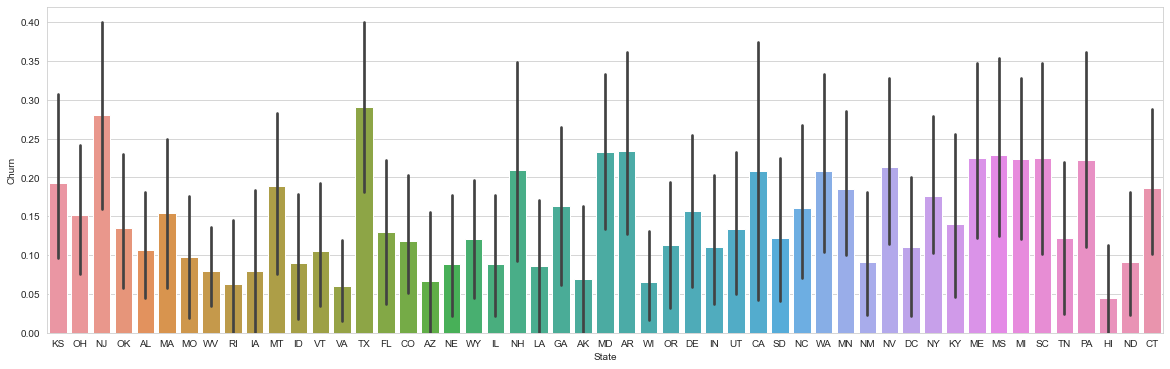

In [23]:
plt.figure(figsize=(20,6))
sns.set_style('whitegrid')
sns.barplot(x='State',y='Churn', data=df)

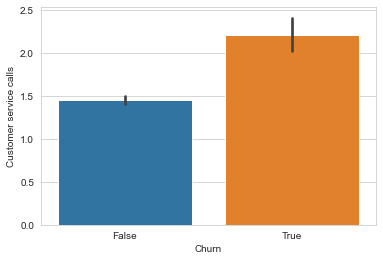

In [24]:
sns.barplot(x='Churn', y='Customer service calls',data=df)

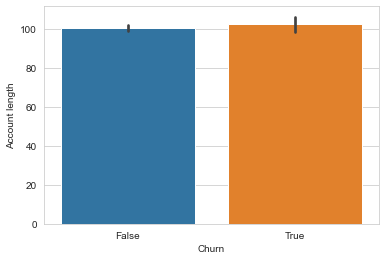

In [25]:
sns.barplot(x='Churn', y='Account length',data=df)

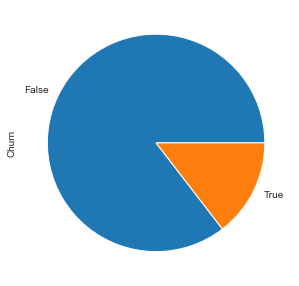

In [26]:
plt.figure(figsize = (5,5))
df['Churn'].value_counts().plot(kind = 'pie')

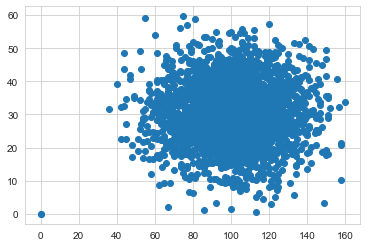

In [27]:
plt.scatter(df['Total day calls'],df["Total day charge"])

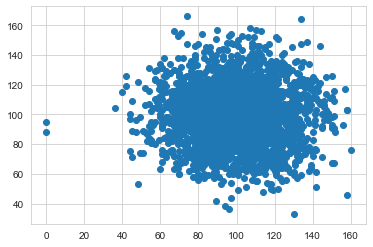

In [28]:
plt.scatter(df['Total day calls'],df["Total night calls"])

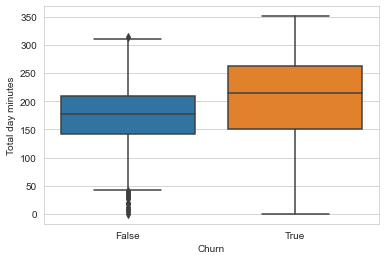

In [29]:
sns.boxplot(x="Churn", y="Total day minutes", data=df)

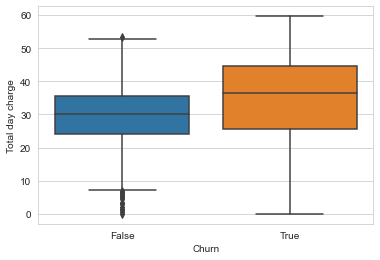

In [30]:
sns.boxplot(x="Churn", y="Total day charge", data=df)

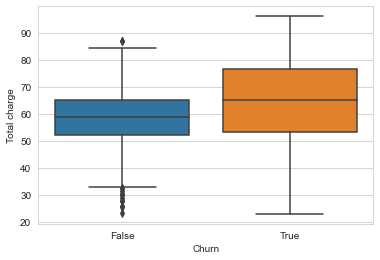

In [31]:
sns.boxplot(x="Churn", y="Total charge", data=df)

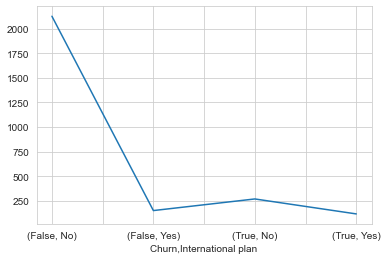

In [32]:
churn_intl = df.groupby(['Churn','International plan']).size()
churn_intl.plot()
plt.show()

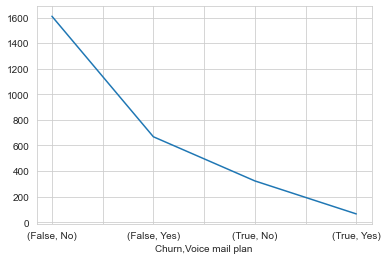

In [33]:
churn_voicem = df.groupby(['Churn','Voice mail plan']).size()
churn_voicem.plot()
plt.show()

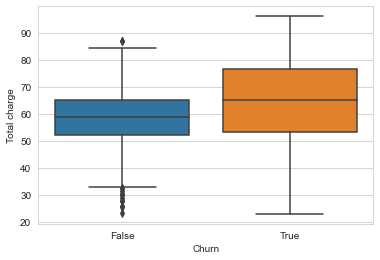

In [34]:
sns.boxplot(x='Churn',y='Total charge', data = df)

In [35]:
df.corr()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
Account length,1.000000,-0.008620,-0.002996,0.002847,0.038862,0.002843,-0.015923,0.018552,-0.015909,-0.008994,-0.024007,-0.008999,0.011369,0.017627,0.011383,0.002455,0.017728,-0.005218
Area code,-0.008620,1.000000,-0.000584,-0.023134,-0.009629,-0.023130,0.000679,-0.018602,0.000707,-0.003353,0.011455,-0.003382,-0.013418,-0.027423,-0.013534,0.034442,0.001019,-0.021753
Number vmail messages,-0.002996,-0.000584,1.000000,0.019027,-0.009622,0.019027,0.011401,0.005131,0.011418,-0.000224,0.008124,-0.000229,-0.004156,0.027013,-0.004136,-0.018787,-0.086474,0.021100
Total day minutes,0.002847,-0.023134,0.019027,1.000000,0.016780,1.000000,0.003999,0.009059,0.003992,0.013491,0.015054,0.013464,-0.011042,0.005687,-0.010934,-0.024543,0.195688,0.883011
Total day calls,0.038862,-0.009629,-0.009622,0.016780,1.000000,0.016787,-0.026003,0.006473,-0.026006,0.008986,-0.016776,0.008972,0.031036,0.006928,0.031133,-0.011945,0.018290,0.008206
Total day charge,0.002843,-0.023130,0.019027,1.000000,0.016787,1.000000,0.004008,0.009056,0.004002,0.013495,0.015057,0.013468,-0.011046,0.005688,-0.010938,-0.024548,0.195689,0.883016
Total eve minutes,-0.015923,0.000679,0.011401,0.003999,-0.026003,0.004008,1.000000,-0.007654,1.000000,-0.013414,0.009017,-0.013450,-0.006915,0.002160,-0.006947,-0.013192,0.072906,0.413272
Total eve calls,0.018552,-0.018602,0.005131,0.009059,0.006473,0.009056,-0.007654,1.000000,-0.007642,-0.000175,0.000797,-0.000135,0.011012,0.003710,0.011000,0.001058,-0.001539,0.005566
Total eve charge,-0.015909,0.000707,0.011418,0.003992,-0.026006,0.004002,1.000000,-0.007642,1.000000,-0.013428,0.009030,-0.013464,-0.006923,0.002169,-0.006955,-0.013196,0.072893,0.413263
Total night minutes,-0.008994,-0.003353,-0.000224,0.013491,0.008986,0.013495,-0.013414,-0.000175,-0.013428,1.000000,0.012736,0.999999,-0.008607,-0.001110,-0.008510,0.005236,0.033639,0.223713


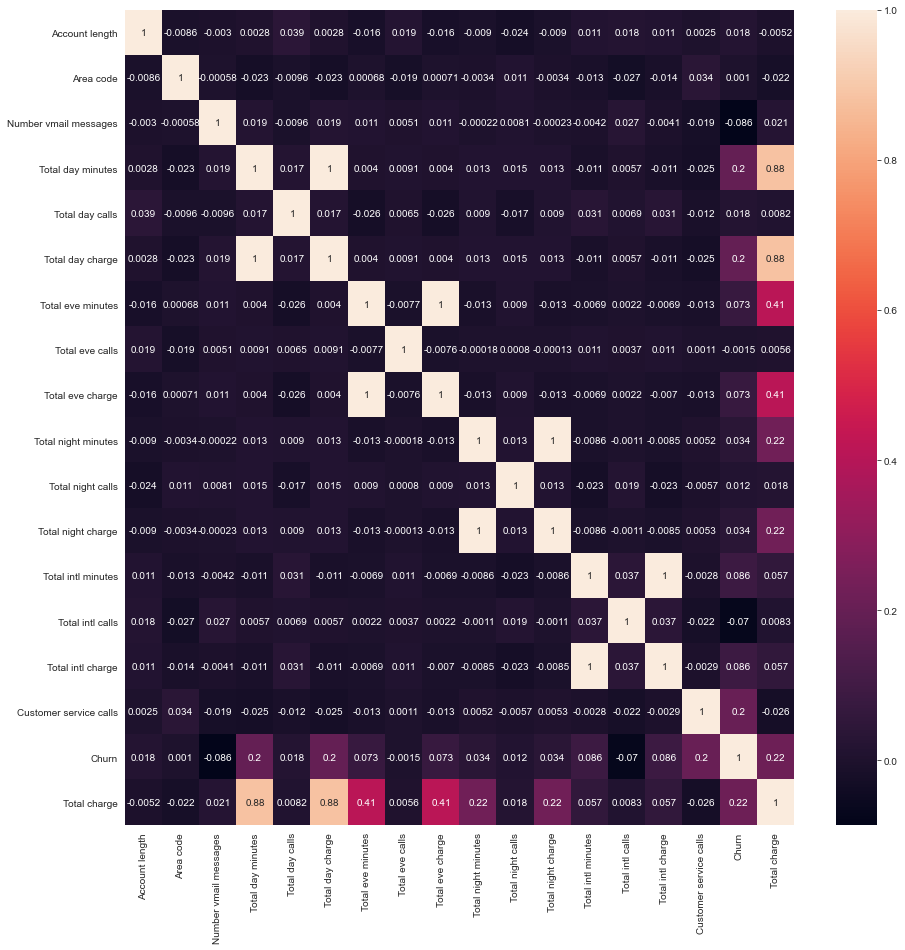

In [36]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr() , annot =True)

# Replacing object to int

In [37]:
df.replace({False: 0, True: 1}, inplace=True)

In [38]:
df = df.replace({'International plan': {'Yes': 1, 'No': 0}}) 

In [39]:
df = df.replace({'Voice mail plan': {'Yes': 1, 'No': 0}}) 

In [40]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,16.78,244.7,91,11.01,10.0,3,2.70,1,0,75.56
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,0,59.24
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,0,62.29
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,0,66.80
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,0,52.09


# converting state column into int

In [41]:
state = df[["State"]]
state = pd.get_dummies(state, drop_first=True)
state.head()

,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df = pd.concat([df,state], axis = 1)

In [43]:
df.drop('State', axis=1,inplace= True)

# data spliting into x and y 

In [44]:
X = df.drop('Churn', axis=1)
y = df.Churn

In [45]:
X


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,0,0
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,0,0
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,0,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,0,0,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,79,415,0,0,0,134.7,98,22.90,189.7,68,...,0,0,0,0,0,0,0,0,0,0
2662,192,415,0,1,36,156.2,77,26.55,215.5,126,...,0,0,0,0,0,0,0,0,0,0
2663,68,415,0,0,0,231.1,57,39.29,153.4,55,...,0,0,0,0,0,0,0,0,1,0
2664,28,510,0,0,0,180.8,109,30.74,288.8,58,...,0,0,0,0,0,0,0,0,0,0


# scaling 

In [46]:
from sklearn.preprocessing import StandardScaler


In [47]:
scaler =StandardScaler()

In [48]:
x= scaler.fit_transform(X)


In [49]:
x = pd.DataFrame(x,columns=X.columns)

In [50]:
x

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,0.692163,-0.527811,-0.335690,1.623917,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
1,0.161278,-0.527811,-0.335690,1.623917,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
2,0.919686,-0.527811,-0.335690,-0.615795,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
3,-0.420168,-0.692467,2.978938,-0.615795,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
4,-0.647691,-0.527811,2.978938,-0.615795,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.527811,-0.335690,-0.615795,-0.589414,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
2662,2.310100,-0.527811,-0.335690,1.623917,2.055754,-0.429549,-1.166419,-0.430042,0.296687,1.288660,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326
2663,-0.824652,-0.527811,-0.335690,-0.615795,-0.589414,0.952365,-2.167199,0.952636,-0.922347,-2.233574,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,5.412528,-0.159326
2664,-1.835863,1.706797,-0.335690,-0.615795,-0.589414,0.024324,0.434829,0.024701,1.735580,-2.084747,...,-0.136835,-0.124976,-0.145137,-0.151736,-0.160559,-0.147809,-0.135405,-0.153025,-0.184757,-0.159326


# Train Test Split

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [53]:
x.shape 

(2666, 69)

In [54]:
y.shape

(2666,)

In [55]:
x_train.shape

(1866, 69)

In [56]:
x_test.shape

(800, 69)

# Hyperparameter Tuning With Classifiers

In [67]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Logistic Regression Classifier

In [78]:
from sklearn.linear_model import LogisticRegression


In [156]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [158]:
logclass = LogisticRegression()

In [159]:
logclass.fit(x_train,y_train)


LogisticRegression()

In [160]:
logclass.score(x_test,y_test)

0.8575

In [161]:
logclass.score(x_train,y_train)

0.8670953912111469

In [162]:
y_pred  = logclass.predict(x_test)

In [163]:
metrics.confusion_matrix(y_test, y_pred)

array([[660,  32],
       [ 82,  26]], dtype=int64)

In [164]:
# Classification Report
report=classification_report(y_test,y_pred) 
print(report)


              precision    recall  f1-score   support

           0       0.89      0.95      0.92       692
           1       0.45      0.24      0.31       108

    accuracy                           0.86       800
   macro avg       0.67      0.60      0.62       800
weighted avg       0.83      0.86      0.84       800



# SVM Classifier

In [165]:
from sklearn.svm import SVC

In [166]:
svm=SVC(kernel='rbf',C=1,gamma='auto') 

In [167]:
svm.fit(x_train,y_train)
svm.score(x_test,y_test)

0.88

In [168]:
svm.score(x_train,y_train)

0.9062165058949625

In [169]:
y_pred  = svm.predict(x_test)

In [170]:
metrics.confusion_matrix(y_test, y_pred)

array([[688,   4],
       [ 92,  16]], dtype=int64)

In [89]:
# Classification Report
report=classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       692
           1       0.80      0.15      0.25       108

    accuracy                           0.88       800
   macro avg       0.84      0.57      0.59       800
weighted avg       0.87      0.88      0.84       800



# Using Cross Validation Score

In [90]:

cv= KFold(n_splits=5,random_state=None, shuffle=False)

In [91]:
cross_val_score(SVC(kernel='poly',C=10,gamma='auto'),x_train,y_train,cv=5)

array([0.8315508 , 0.82573727, 0.88203753, 0.84718499, 0.83914209])

In [92]:
cross_val_score(SVC(kernel='linear',C=10,gamma='auto'),x_train,y_train,cv=5)

array([0.84491979, 0.84986595, 0.85790885, 0.85254692, 0.84986595])

In [93]:
cross_val_score(SVC(kernel='rbf',C=10,gamma='auto'),x_train,y_train,cv=5)

array([0.85294118, 0.8766756 , 0.89008043, 0.86863271, 0.86058981])

In [94]:
cross_val_score(SVC(kernel='rbf',C=20,gamma='auto'),x_train,y_train,cv=5)

array([0.85294118, 0.86058981, 0.88203753, 0.86058981, 0.85790885])

In [95]:
cross_val_score(SVC(kernel='linear',C=20,gamma='auto'),x_train,y_train,cv=5)

array([0.84491979, 0.84986595, 0.85790885, 0.84986595, 0.84986595])

In [96]:
kernels = ['rbf','linear','poly']
C=[1,10,20]
G=['auto','scale']
avg_scrore = {}
for Kval in kernels:
    for cvl in C:
        for Gam in G:
            cv_score = cross_val_score(SVC(kernel=Kval,C=cvl,gamma=Gam),x_train,y_train,cv=5)
            avg_scrore[Kval +"_", Gam + str(cvl)] = np.average(cv_score)
            
       
        
avg_scrore

{('rbf_', 'auto1'): 0.8654915341715531,
 ('rbf_', 'scale1'): 0.8654915341715531,
 ('rbf_', 'auto10'): 0.8697839457498817,
 ('rbf_', 'scale10'): 0.8703201387793724,
 ('rbf_', 'auto20'): 0.8628134363665036,
 ('rbf_', 'scale20'): 0.8628134363665036,
 ('linear_', 'auto1'): 0.8504867313730269,
 ('linear_', 'scale1'): 0.8504867313730269,
 ('linear_', 'auto10'): 0.8510214907313157,
 ('linear_', 'scale10'): 0.8510214907313157,
 ('linear_', 'auto20'): 0.8504852977018251,
 ('linear_', 'scale20'): 0.8504852977018251,
 ('poly_', 'auto1'): 0.853701022207567,
 ('poly_', 'scale1'): 0.853701022207567,
 ('poly_', 'auto10'): 0.8451305357629282,
 ('poly_', 'scale10'): 0.8451305357629282,
 ('poly_', 'auto20'): 0.8467348138377945,
 ('poly_', 'scale20'): 0.8467348138377945}

#  Random Forest Classifier

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 123,max_depth = 9, criterion = "gini")


In [99]:
rfc.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, random_state=123)

In [100]:
rfc.score(x_train,y_train)

0.9796355841371919

In [101]:
rfc.score(x_test,y_test)

0.94375

In [171]:
y_pred  = rfc.predict(x_test)

In [172]:
metrics.confusion_matrix(y_test, y_pred)

array([[692,   0],
       [ 45,  63]], dtype=int64)

In [105]:
# Classification Report
report=classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       692
           1       1.00      0.58      0.74       108

    accuracy                           0.94       800
   macro avg       0.97      0.79      0.85       800
weighted avg       0.95      0.94      0.94       800



#  KNN Classifier

In [106]:
from sklearn.neighbors import KNeighborsClassifier

In [107]:
knn = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                           metric_params=None,n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')


In [108]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=1)

In [109]:
knn.score(x_train,y_train)

0.87513397642015

In [110]:
knn.score(x_test,y_test)

0.8675

In [173]:
y_pred  = knn.predict(x_test)

In [174]:
metrics.confusion_matrix(y_test, y_pred)

array([[690,   2],
       [104,   4]], dtype=int64)

In [175]:
# Classification Report
report=classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.87      1.00      0.93       692
           1       0.67      0.04      0.07       108

    accuracy                           0.87       800
   macro avg       0.77      0.52      0.50       800
weighted avg       0.84      0.87      0.81       800



# Decision Tree Classifier

In [113]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [114]:
decision_tree = DecisionTreeClassifier(max_depth = 9, random_state = 123,splitter = "best", criterion = "gini")

In [115]:
decision_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, random_state=123)

In [116]:
decision_tree.score(x_train,y_train)

0.9871382636655949

In [117]:
decision_tree.score(x_test,y_test)

0.95875

In [118]:
y_pred  = decision_tree.predict(x_test)

In [119]:
y_pred  = decision_tree.predict(x_test)
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [120]:
from sklearn import metrics 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 

In [121]:
metrics.confusion_matrix(y_test, y_pred)

array([[681,  11],
       [ 22,  86]], dtype=int64)

In [122]:
# Classification Report
report=classification_report(y_test,y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       692
           1       0.89      0.80      0.84       108

    accuracy                           0.96       800
   macro avg       0.93      0.89      0.91       800
weighted avg       0.96      0.96      0.96       800



# Clustering

In [123]:
from sklearn.cluster import KMeans

In [124]:
df = pd.read_csv("churn_telecom.csv")

In [125]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [126]:
df = df.replace({'International plan': {'Yes': 1, 'No': 0}}) 
df = df.replace({'Voice mail plan': {'Yes': 1, 'No': 0}}) 
df.replace({False: 0, True: 1}, inplace=True)

In [127]:
df.drop(['State'] ,axis=1,inplace = True)

In [128]:
km= KMeans(n_clusters=4)

In [129]:
km.fit(df)

KMeans(n_clusters=4)

In [130]:
y_predicted = km.fit_predict(df)
y_predicted

array([2, 1, 2, ..., 2, 0, 2])

In [131]:
df['cluster']=y_predicted
df.head(25)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,cluster
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,2
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,2
3,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,2
4,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1
5,118,510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0,0
6,121,510,0,1,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0,0
7,147,415,1,0,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0,1
8,141,415,1,1,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0,1
9,74,415,0,0,0,187.7,127,31.91,163.4,148,13.89,196.0,94,8.82,9.1,5,2.46,0,0,1


In [132]:
cluster=km.cluster_centers_

In [133]:
print(cluster)

[[9.99745628e+01 5.10000000e+02 1.14467409e-01 2.78219396e-01
  7.95707472e+00 1.79350715e+02 1.00203498e+02 3.04901908e+01
  1.98069157e+02 9.91287758e+01 1.68363116e+01 2.03241812e+02
  1.00327504e+02 9.14583466e+00 1.01949126e+01 4.40381558e+00
  2.75305246e+00 1.64705882e+00 1.31955485e-01]
 [9.84541608e+01 4.13215797e+02 9.87306065e-02 2.52468265e-01
  7.46262341e+00 1.74784908e+02 1.01102962e+02 2.97140339e+01
  1.71857546e+02 9.98095910e+01 1.46080113e+01 2.43597461e+02
  1.00105783e+02 1.09621157e+01 1.03844852e+01 4.51763047e+00
  2.80440056e+00 1.57545839e+00 1.07193230e-01]
 [1.00516997e+02 4.15076487e+02 1.03399433e-01 2.97450425e-01
  8.87252125e+00 2.31723229e+02 1.00215297e+02 3.93934278e+01
  2.14405807e+02 1.00291785e+02 1.82247450e+01 1.79523654e+02
  1.00056657e+02 8.07859773e+00 1.01723796e+01 4.44334278e+00
  2.74715297e+00 1.52124646e+00 2.19546742e-01]
 [1.03860129e+02 4.17054662e+02 8.84244373e-02 2.71704180e-01
  7.75884244e+00 1.25670900e+02 9.96221865e+01 2.1

In [134]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [135]:
from sklearn.metrics import silhouette_score

In [136]:
score = silhouette_score(df, y_predicted)
score

0.1459567951774042

# Cdist Clustring

In [137]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [138]:
df = pd.read_csv("churn_telecom.csv")
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [139]:
df = df.replace({'International plan': {'Yes': 1, 'No': 0}}) 
df = df.replace({'Voice mail plan': {'Yes': 1, 'No': 0}}) 

In [140]:
df.drop(['State','Churn'] ,axis=1,inplace = True)

In [141]:
from scipy.stats import zscore
zc=zscore

In [142]:
df_z=df.apply(zc)

In [143]:
df_z

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.692163,-0.527811,-0.335690,1.623917,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172
1,0.161278,-0.527811,-0.335690,1.623917,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172
2,0.919686,-0.527811,-0.335690,-0.615795,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955
3,-0.420168,-0.692467,2.978938,-0.615795,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610
4,-0.647691,-0.527811,2.978938,-0.615795,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.527811,-0.335690,-0.615795,-0.589414,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610
2662,2.310100,-0.527811,-0.335690,1.623917,2.055754,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610
2663,-0.824652,-0.527811,-0.335690,-0.615795,-0.589414,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392
2664,-1.835863,1.706797,-0.335690,-0.615795,-0.589414,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610


Text(0.5, 1.0, 'selecting k with the Elbow Method')

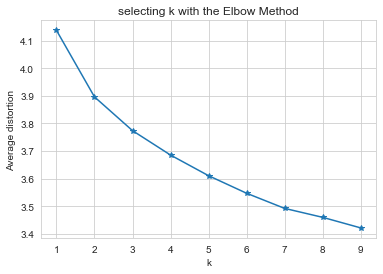

In [144]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
kvalue=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(df_z)
    prediction=model.predict(df_z)
    kvalue.append(sum(np.min(cdist(df_z,model.cluster_centers_,'euclidean'),axis=1)) /df_z
                 .shape[0])

plt.plot(clusters,kvalue, '*-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('selecting k with the Elbow Method')

In [145]:
kmeans = KMeans(n_clusters=3)

In [146]:
kmeans.fit(df_z)

KMeans(n_clusters=3)

In [147]:
centroids = kmeans.cluster_centers_

In [148]:
centroids

array([[ 1.51628446e-03,  1.17795293e-02,  5.32110436e-03,
         1.62391742e+00,  1.55824804e+00,  2.78345969e-02,
        -1.40807721e-02,  2.78363812e-02,  3.39069028e-02,
         8.08258453e-03,  3.39321529e-02,  3.15144782e-03,
         2.72454321e-02,  3.15177789e-03, -2.87792868e-02,
         2.86497073e-02, -2.87282700e-02, -3.47019352e-02],
       [ 5.73149584e-04, -2.26027341e-02, -3.65235881e-02,
        -6.08903439e-01, -5.84590438e-01, -6.06921601e-01,
         5.21202357e-02, -6.06921648e-01, -2.78768843e-01,
        -2.50863494e-02, -2.78785130e-01,  2.64781344e-01,
        -5.42275645e-02,  2.64825281e-01,  4.11460751e-01,
        -1.28146628e-02,  4.11488308e-01,  1.05948803e-01],
       [-1.72992954e-03,  1.39816932e-02,  3.29848371e-02,
        -6.13466678e-01, -5.88344225e-01,  5.94030291e-01,
        -4.21542068e-02,  5.94028986e-01,  2.56841466e-01,
         1.93004018e-02,  2.56838838e-01, -2.70747625e-01,
         3.43138829e-02, -2.70792406e-01, -3.95212196e

In [149]:
centroids_df= pd.DataFrame(centroids,columns= list(df_z))

In [150]:
centroids_df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,0.001516,0.011780,0.005321,1.623917,1.558248,0.027835,-0.014081,0.027836,0.033907,0.008083,0.033932,0.003151,0.027245,0.003152,-0.028779,0.028650,-0.028728,-0.034702
1,0.000573,-0.022603,-0.036524,-0.608903,-0.584590,-0.606922,0.052120,-0.606922,-0.278769,-0.025086,-0.278785,0.264781,-0.054228,0.264825,0.411461,-0.012815,0.411488,0.105949
2,-0.001730,0.013982,0.032985,-0.613467,-0.588344,0.594030,-0.042154,0.594029,0.256841,0.019300,0.256839,-0.270748,0.034314,-0.270792,-0.395212,-0.008723,-0.395279,-0.081084


In [191]:
kmeans.labels_

array([0, 0, 2, ..., 2, 1, 0])

In [197]:
cul=pd.DataFrame(kmeans.labels_,columns=list(['labels']))

In [198]:
cul

,labels
0,0
1,0
2,2
3,2
4,1
...,...
2661,1
2662,0
2663,2
2664,1


In [200]:
cul['labels']= cul['labels'].astype('category')

In [202]:
df = df_z.join(cul.labels)

In [203]:
df

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,labels
0,0.692163,-0.527811,-0.335690,1.623917,1.247508,1.579670,0.484868,1.579942,-0.058619,-0.050781,-0.058445,0.857403,-0.469031,0.856707,-0.085020,-0.597527,-0.085681,-0.429172,0
1,0.161278,-0.527811,-0.335690,1.623917,1.320985,-0.329918,1.135375,-0.330194,-0.095916,0.147654,-0.095397,1.048458,0.149054,1.049293,1.242179,-0.597527,1.242921,-0.429172,0
2,0.919686,-0.527811,-0.335690,-0.615795,-0.589414,1.179302,0.685024,1.179465,-1.554439,0.494917,-1.554963,-0.759668,0.200561,-0.758391,0.704125,0.216894,0.698194,-1.191955,2
3,-0.420168,-0.692467,2.978938,-0.615795,-0.589414,2.212509,-1.466653,2.212675,-2.718509,-0.596479,-2.718922,-0.084083,-0.572045,-0.084339,-1.304609,1.031314,-1.307995,0.333610,2
4,-0.647691,-0.527811,2.978938,-0.615795,-0.589414,-0.235822,0.634985,-0.235772,-1.022461,1.090224,-1.021482,-0.281046,1.076181,-0.281303,-0.049150,-0.597527,-0.045823,1.096392,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2661,-0.546569,-0.527811,-0.335690,-0.615795,-0.589414,-0.826226,-0.115600,-0.826178,-0.209771,-1.588658,-0.210869,0.398478,1.436730,0.397126,0.560644,0.216894,0.565334,0.333610,1
2662,2.310100,-0.527811,-0.335690,1.623917,2.055754,-0.429549,-1.166419,-0.430042,0.296687,1.288660,0.297208,1.534958,-0.881087,1.535136,-0.120891,0.624104,-0.125539,0.333610,0
2663,-0.824652,-0.527811,-0.335690,-0.615795,-0.589414,0.952365,-2.167199,0.952636,-0.922347,-2.233574,-0.922176,-0.194382,1.179195,-0.193763,-0.228501,-0.190317,-0.231828,1.096392,2
2664,-1.835863,1.706797,-0.335690,-0.615795,-0.589414,0.024324,0.434829,0.024701,1.735580,-2.084747,1.735990,-0.182564,-0.469031,-0.180632,1.385660,0.624104,1.389067,0.333610,1


In [204]:
df.groupby('labels')['labels'].count()

labels
0    729
1    975
2    962
Name: labels, dtype: int64